In [129]:
#HYPER PARAMETERS: 
#L1: l1 regularizer, aka Lasso Regression (Least Absolute Shrinkage and Selection Operator), adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
#L2: l2 regularizer, aka Ridge regression, adds “squared magnitude” of coefficient as penalty term to the loss function. 
#beta: scaling factor for the sparsity penalty
#rho: average activation target for calculating the sparsity penalty
#LR: learning rate

#PERFORMACE METRICS
#final_cost: MSE + (beta * sparsity_cost)
#MSE: mean squared error
#sparsity cost: result from the cross entropy / KL divergence function
#accuracy: correct predictions divided by total number of predictios
#accuracy_cost: (1 - accuracy) + (beta * sparsity_cost)

mydata <- read.table("/home/rdias/myscripts/raqueld/Autoencoder_tensorflow/search_grid_results_no_mask_0/TMP_RESULT_parsed.txt", header=F, sep=",")
names(mydata) <- c("L1", "L2", "beta", "rho", "activation", "LR", "final_cost", "MSE", "sparsity_cost", "accuracy", "accuracy_cost")
head(mydata)
str(mydata)

L1,L2,beta,rho,activation,LR,final_cost,MSE,sparsity_cost,accuracy,accuracy_cost
1e-04,1e-05,0.05,0.004,tanh,1e+01,Inf,7.317570e+00,Inf,0.2317980,Inf
1e-03,1e-05,0.01,0.700,tanh,1e-01,6.051308e+06,6.051308e+06,0.630338311,0.2824272,0.7238762
1e-05,1e-01,0.01,0.001,relu,1e-03,1.956887e+00,1.956810e+00,0.007693605,0.4783952,0.5216817
1e-07,1e-03,2.00,0.040,relu,1e+00,1.960640e+00,1.956790e+00,0.001924732,0.4783952,0.5254542
1e-05,1e-01,1.00,0.100,tanh,1e-03,1.145673e+02,1.140806e+02,0.486763477,0.4541833,1.0325801
1e-07,1e-01,0.01,0.100,relu,1e-05,1.957060e+00,1.956952e+00,0.010779531,0.4783950,0.5217128


'data.frame':	3100 obs. of  11 variables:
 $ L1           : num  1e-04 1e-03 1e-05 1e-07 1e-05 1e-07 1e-03 1e-02 1e-01 1e-04 ...
 $ L2           : num  1e-05 1e-05 1e-01 1e-03 1e-01 1e-01 1e-06 1e-08 1e-04 1e-08 ...
 $ beta         : num  0.05 0.01 0.01 2 1 0.01 0.01 0.05 1 10 ...
 $ rho          : num  0.004 0.7 0.001 0.04 0.1 0.1 0.07 0.01 1 0.01 ...
 $ activation   : Factor w/ 3 levels "relu","sigmoid",..: 3 3 1 1 3 1 3 1 2 3 ...
 $ LR           : num  1e+01 1e-01 1e-03 1e+00 1e-03 1e-05 1e-03 1e+01 1e-01 1e+02 ...
 $ final_cost   : num  Inf 6.05e+06 1.96 1.96 1.15e+02 ...
 $ MSE          : num  7.32 6.05e+06 1.96 1.96 1.14e+02 ...
 $ sparsity_cost: num  Inf 0.63034 0.00769 0.00192 0.48676 ...
 $ accuracy     : num  0.232 0.282 0.478 0.478 0.454 ...
 $ accuracy_cost: num  Inf 0.724 0.522 0.525 1.033 ...


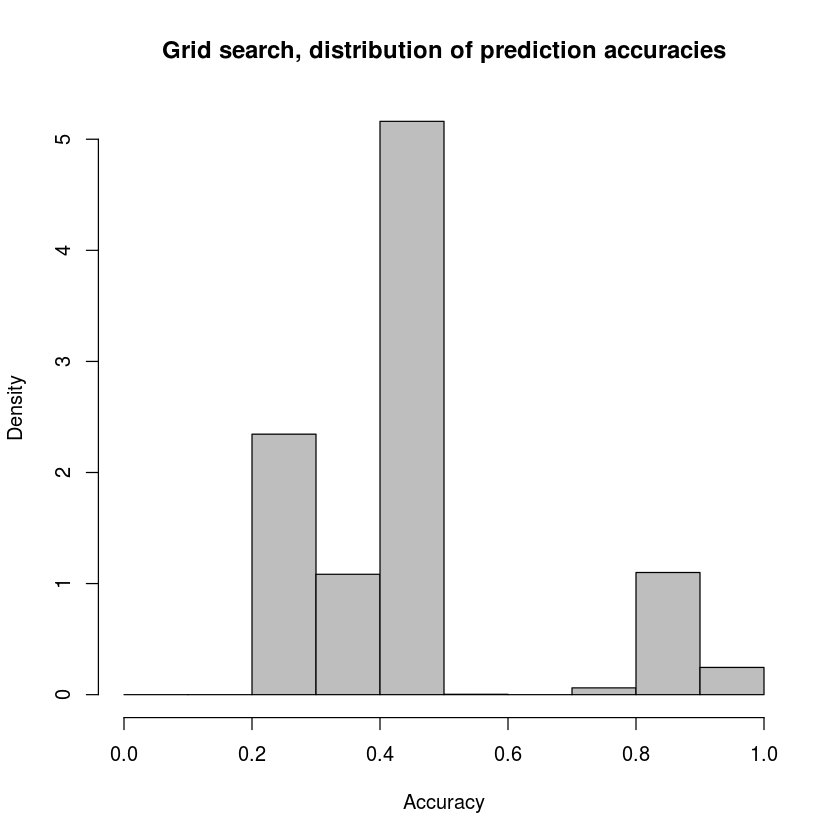

In [130]:
 hist(mydata[,10], freq=F, xlab="Accuracy", main="Grid search, distribution of prediction accuracies", 
      breaks=seq(0,1,by=0.1), col="gray")

In [131]:
mydata.pca <- prcomp(mydata[,c(1:4,6,10)], center = TRUE,scale. = TRUE)

summary(mydata.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6
Standard deviation     1.1320 1.0120 1.0062 0.9936 0.9874 0.8484
Proportion of Variance 0.2136 0.1707 0.1687 0.1646 0.1625 0.1200
Cumulative Proportion  0.2136 0.3843 0.5530 0.7176 0.8800 1.0000

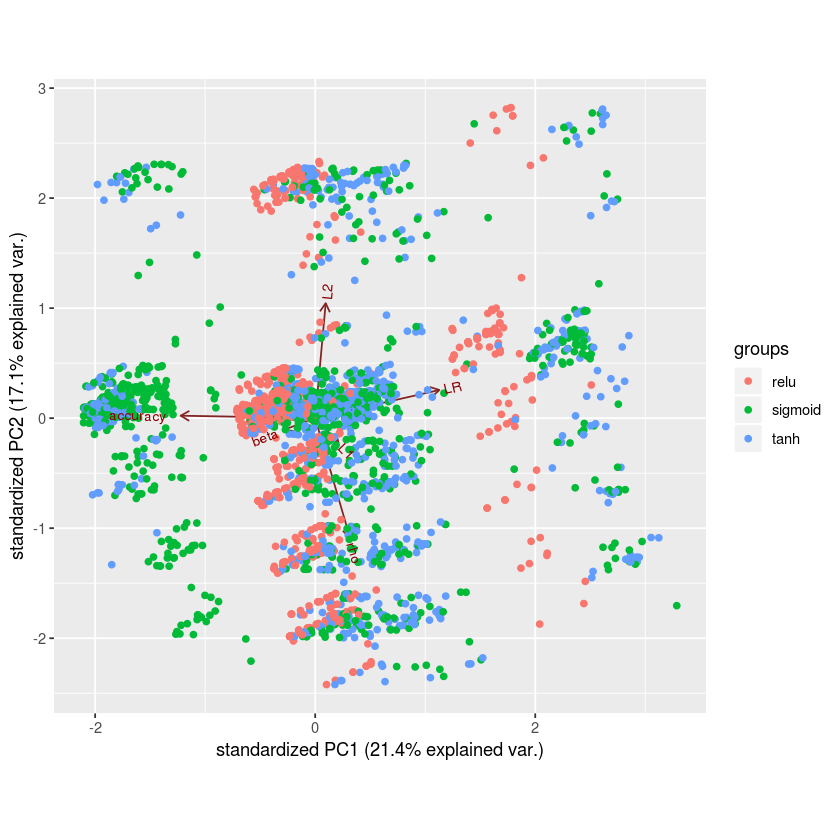

In [132]:
library(ggbiplot)

ggbiplot(mydata.pca, groups=mydata[,5])
#sigmoid and tanh seem to result in higher accuracies overall
#Lower learning rates seem to result in better accuracies

In [133]:
library(Hmisc)


In [134]:
flattenCorrMatrix <- function(cormat, pmat) {
  ut <- upper.tri(cormat)
  data.frame(
    row = rownames(cormat)[row(cormat)[ut]],
    column = rownames(cormat)[col(cormat)[ut]],
    cor  =(cormat)[ut],
    p = pmat[ut]
    )
}


In [135]:
filtered_data <- mydata[,c(-5)]
filtered_data <- filtered_data[ complete.cases(filtered_data),]
#head(filtered_data)
#str(filtered_data)

filtered_data <- filtered_data[is.finite(rowSums(filtered_data)),]
#head(filtered_data)
                                     


In [136]:
res<-rcorr(as.matrix(filtered_data))
correls <- flattenCorrMatrix(res$r, res$P)
 

Warning message in sqrt(1 - h * h):
“NaNs produced”

In [137]:
filtered_correls <- subset(correls, p<=0.05)
filtered_correls

,row,column,cor,p
15,LR,final_cost,0.31544492,0.000000e+00
20,LR,MSE,0.31544492,0.000000e+00
22,L1,sparsity_cost,0.05763233,2.241331e-03
24,beta,sparsity_cost,-0.08553617,5.611304e-06
25,rho,sparsity_cost,0.47036338,0.000000e+00
29,L1,accuracy,-0.04777135,1.132035e-02
31,beta,accuracy,0.06957523,2.233952e-04
32,rho,accuracy,-0.08051305,1.928690e-05
33,LR,accuracy,-0.29098352,0.000000e+00
34,final_cost,accuracy,-0.09385218,6.233448e-07


In [138]:
res2 <- cor(filtered_data)

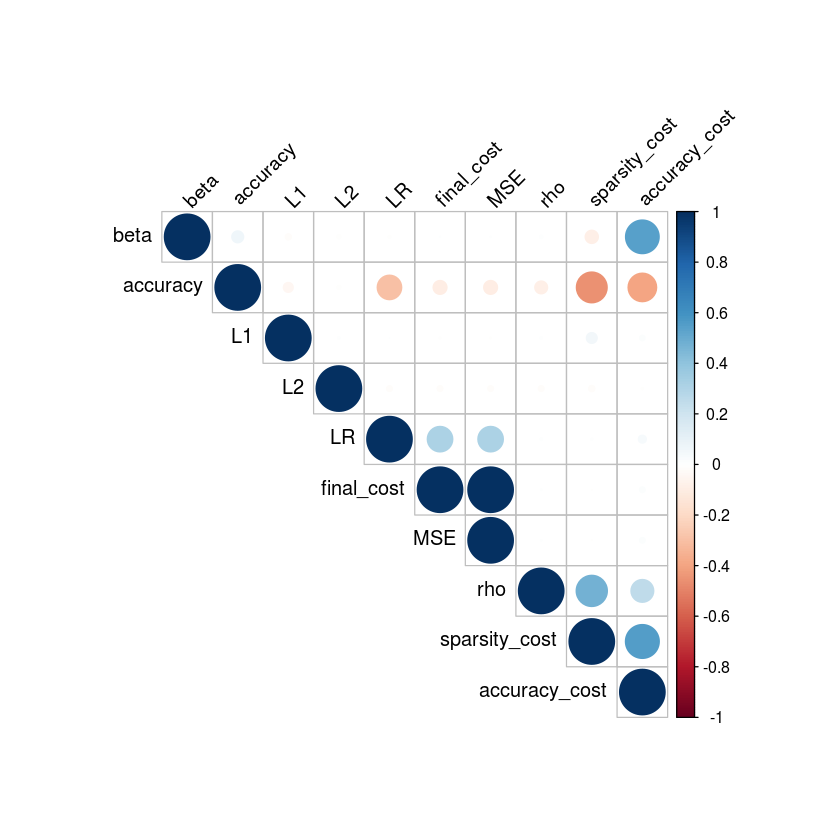

In [139]:
library(corrplot)
corrplot(res2, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)


In [ ]:
#Sparsity_cost, accuracy_cost, and final_cost are expected to be correlated to beta or/and rho because these parameters influence those equations directly, so nothing new among those
#But learning rate exhibited some interesting correlation to the accuracy metrics
# I will comment this in further detail bellow.
#For understanding what specific combinations of hyperparameters are responsible for the best accuracy results, I will filter out the noisy, lower accuracy models

In [150]:
best_results <- subset(mydata, accuracy>=0.7)
filtered_data <- best_results[,c(-5)]
filtered_data <- filtered_data[ complete.cases(filtered_data),]
head(filtered_data)
#str(filtered_data)

filtered_data <- filtered_data[is.finite(rowSums(filtered_data)),]
#head(filtered_data)

,L1,L2,beta,rho,LR,final_cost,MSE,sparsity_cost,accuracy,accuracy_cost
14,1e-02,1e-05,1.000,1.000,1e-05,0.8799685,0.6037766,0.2761919200,0.8492067,0.42698523
37,1e-03,1e-05,1.000,0.004,1e-04,0.2617852,0.2593719,0.0024133509,0.9063537,0.09605964
39,1e-01,1e-02,8.000,0.700,1e-05,2.4337897,0.5358137,0.2372469902,0.8324054,2.06557059
43,1e-04,1e-03,6.000,0.007,1e-04,0.3128883,0.3092319,0.0006093921,0.8925299,0.11112645
46,1e-02,1e-07,4.000,0.700,1e-05,1.4074969,0.4700542,0.2343606949,0.8511893,1.08625340
49,1e-06,1e-01,0.001,0.001,1e-05,0.4684668,0.4683215,0.1452890337,0.8495687,0.15057656


In [151]:
res3 <- cor(filtered_data)
head(filtered_data)

,L1,L2,beta,rho,LR,final_cost,MSE,sparsity_cost,accuracy,accuracy_cost
14,1e-02,1e-05,1.000,1.000,1e-05,0.8799685,0.6037766,0.2761919200,0.8492067,0.42698523
37,1e-03,1e-05,1.000,0.004,1e-04,0.2617852,0.2593719,0.0024133509,0.9063537,0.09605964
39,1e-01,1e-02,8.000,0.700,1e-05,2.4337897,0.5358137,0.2372469902,0.8324054,2.06557059
43,1e-04,1e-03,6.000,0.007,1e-04,0.3128883,0.3092319,0.0006093921,0.8925299,0.11112645
46,1e-02,1e-07,4.000,0.700,1e-05,1.4074969,0.4700542,0.2343606949,0.8511893,1.08625340
49,1e-06,1e-01,0.001,0.001,1e-05,0.4684668,0.4683215,0.1452890337,0.8495687,0.15057656


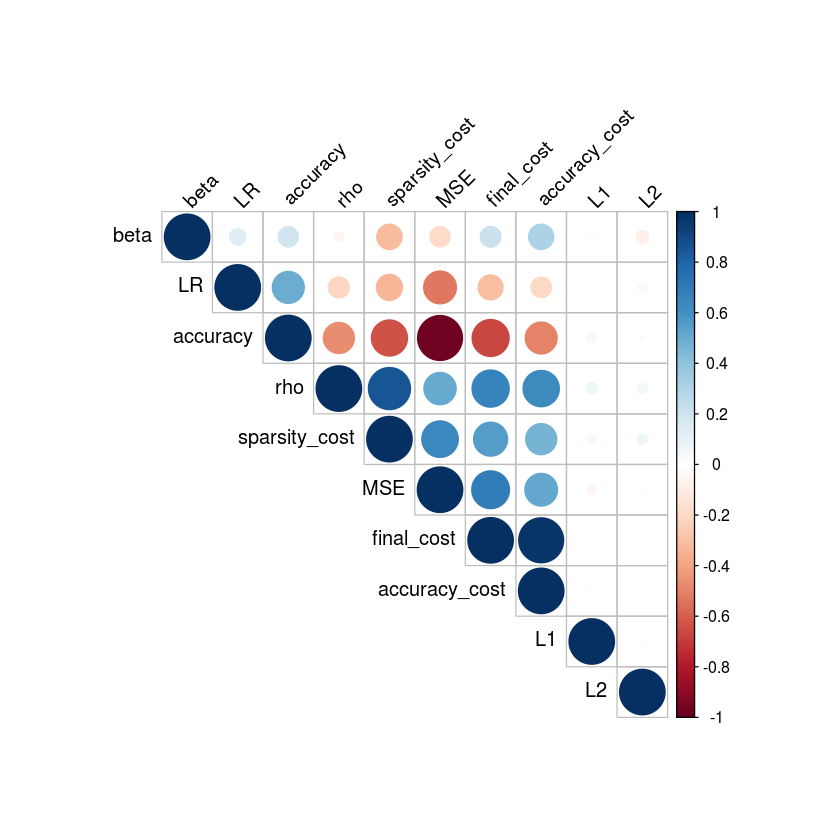

In [152]:
corrplot(res3, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

In [ ]:
#From correlation analysis results across all gridsearch samples, only learning rate seems to have a stronger correlation to accuracy, when compared to other hyperparameters. It exhibited an inverse correlation to accuracy values.
#PCA results indicate that relu function results in mostly low accuracies overall, whereas sigmoid and tanh can result in either high or low accuracies depending on specific hyperparameter combinations.
#Although there is no strong correlation between hyperparameter-accuracy pairs across all results, 
#if we filter out the noise produced by random combinations of parameters that produce low accuracy values (<0.7), we can observe that lower rho and higher beta values result in higher accuracies among the best results/
#Interestingly, the correlation between learning rate and accuracy is even stronger among the best accuracy results (accuracy >= 0.7), but it is positive among the best models (versus negative across all search grid results)
#New correlations are also reveald among the best rersults, for example: learning rate and rho seem to be inverse correlated among the best models. I don't know the reasoning for this interesting association between these two hyperparameters.

In [153]:
res<-rcorr(as.matrix(filtered_data))
correls <- flattenCorrMatrix(res$r, res$P)

In [154]:
filtered_correls <- subset(correls, p<=0.05)
filtered_correls

,row,column,cor,p
9,beta,LR,0.1315153,5.956032e-03
10,rho,LR,-0.2143236,6.333749e-06
13,beta,final_cost,0.2116517,8.298791e-06
14,rho,final_cost,0.6682851,0.000000e+00
15,LR,final_cost,-0.3037776,9.259038e-11
18,beta,MSE,-0.1996137,2.687873e-05
19,rho,MSE,0.5046444,0.000000e+00
20,LR,MSE,-0.5201518,0.000000e+00
21,final_cost,MSE,0.6912439,0.000000e+00
24,beta,sparsity_cost,-0.3118623,2.738343e-11


In [155]:
mydata.pca <- prcomp(best_results[,c(1:4,6,10)], center = TRUE,scale. = TRUE)


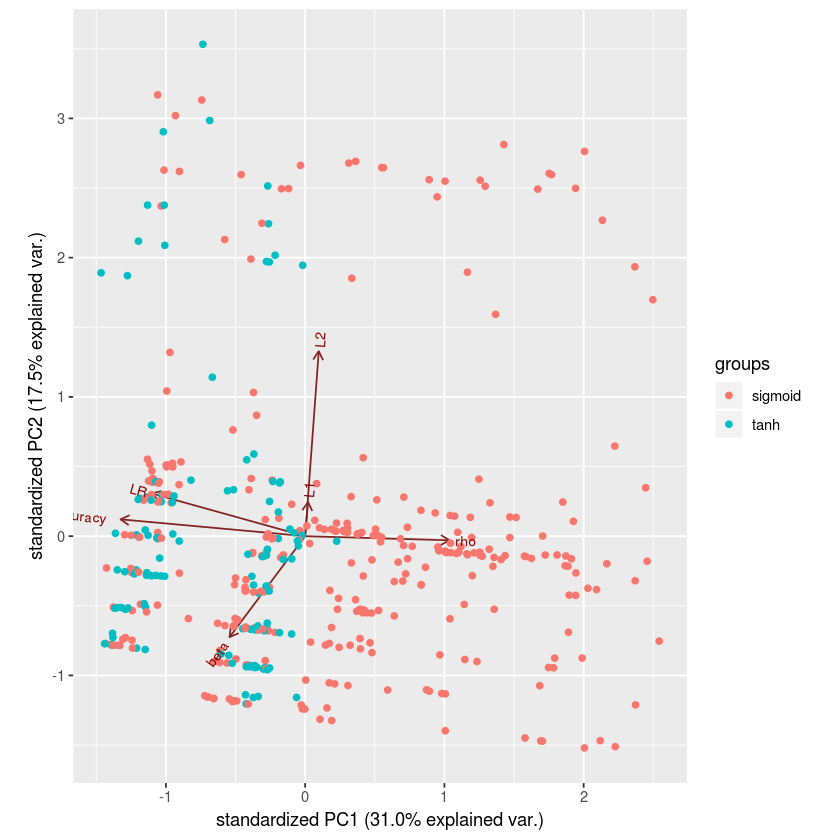

In [157]:
ggbiplot(mydata.pca, groups=best_results[,5])


In [ ]:
#The PCA for the best model hyperparameters parameters also shows an inverse correlation betwen accuray and rho, as well as a strong correlation between learning rate and accuracy.
#beta seems to show a weak, positive correlation to accuracy as well
#sigmoid seems to be distrbuted across all best model accuracy values, whereas tanh seens tobe distributed across the best hyper parameter combinations

In [ ]:
#The relationships between regularizers and model performance or redularizers and other parameters seem unconclusive

In [159]:
head(best_results)

,L1,L2,beta,rho,activation,LR,final_cost,MSE,sparsity_cost,accuracy,accuracy_cost
14,1e-02,1e-05,1.000,1.000,sigmoid,1e-05,0.8799685,0.6037766,0.2761919200,0.8492067,0.42698523
37,1e-03,1e-05,1.000,0.004,sigmoid,1e-04,0.2617852,0.2593719,0.0024133509,0.9063537,0.09605964
39,1e-01,1e-02,8.000,0.700,sigmoid,1e-05,2.4337897,0.5358137,0.2372469902,0.8324054,2.06557059
43,1e-04,1e-03,6.000,0.007,tanh,1e-04,0.3128883,0.3092319,0.0006093921,0.8925299,0.11112645
46,1e-02,1e-07,4.000,0.700,sigmoid,1e-05,1.4074969,0.4700542,0.2343606949,0.8511893,1.08625340
49,1e-06,1e-01,0.001,0.001,sigmoid,1e-05,0.4684668,0.4683215,0.1452890337,0.8495687,0.15057656


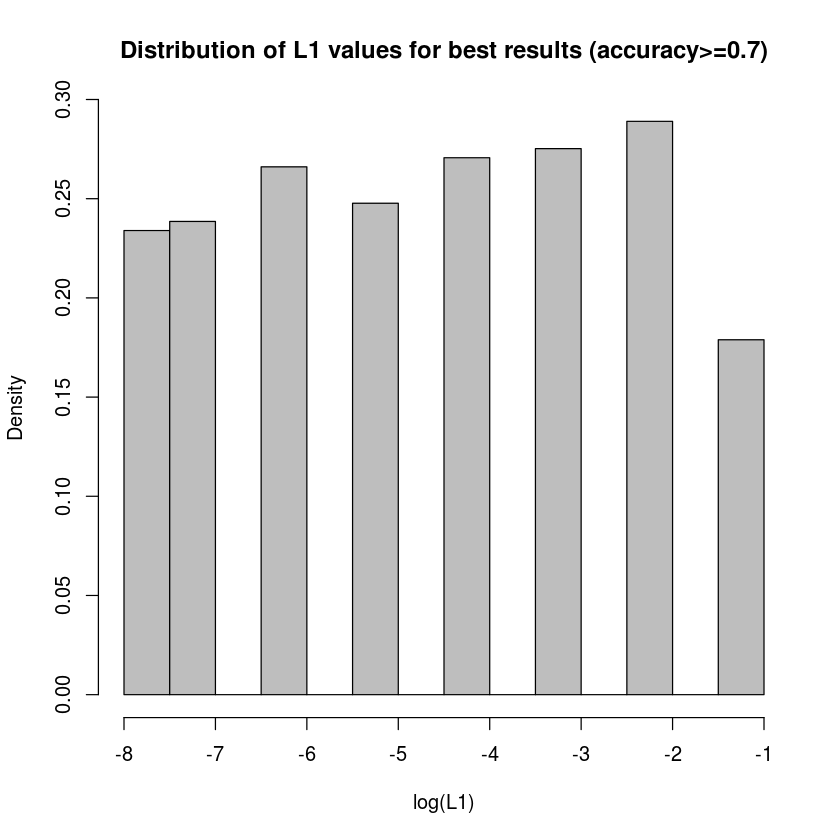

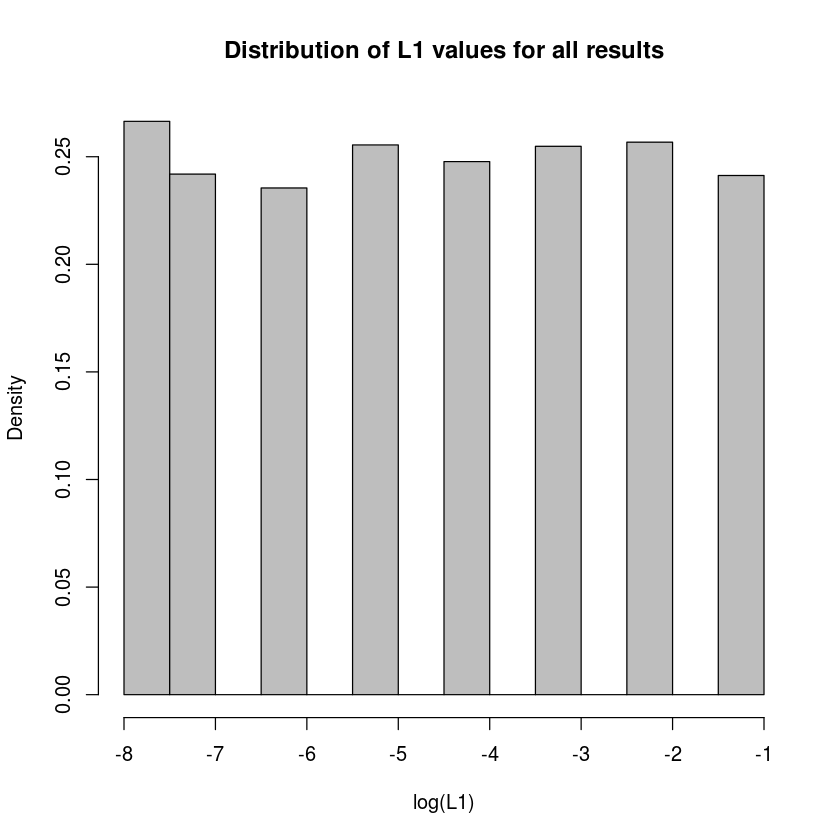

In [197]:
hist(log10(best_results$L1), freq=F, 
     xlab="log(L1)", col="grey", 
     main="Distribution of L1 values for best results (accuracy>=0.7)"
     )
hist(log10(mydata$L1), freq=F, 
     xlab="log(L1)", col="grey", 
     main="Distribution of L1 values for all results"
     )

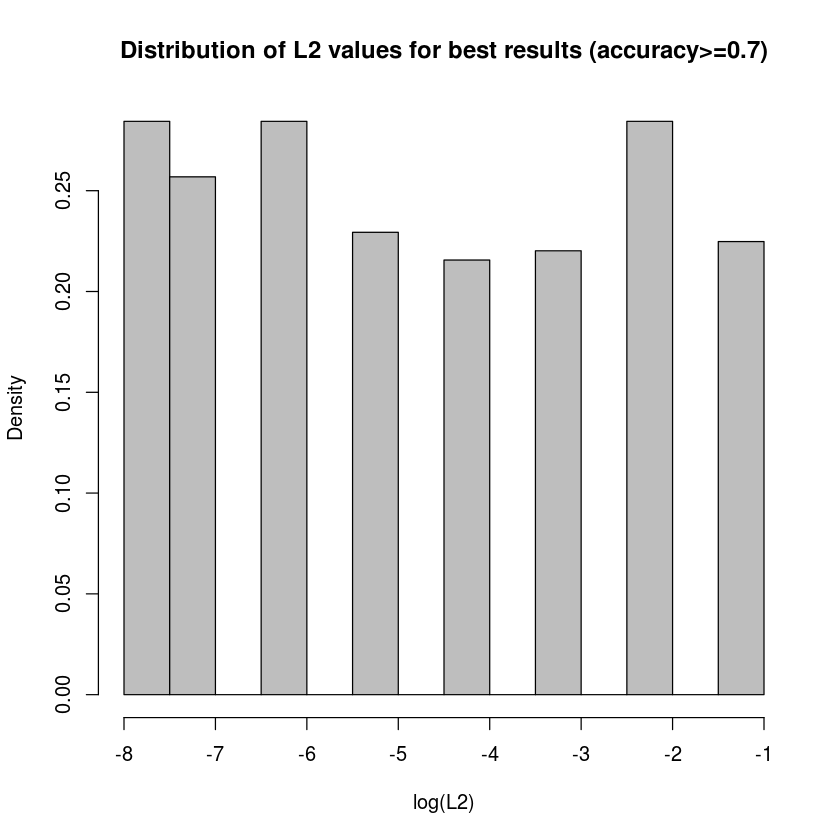

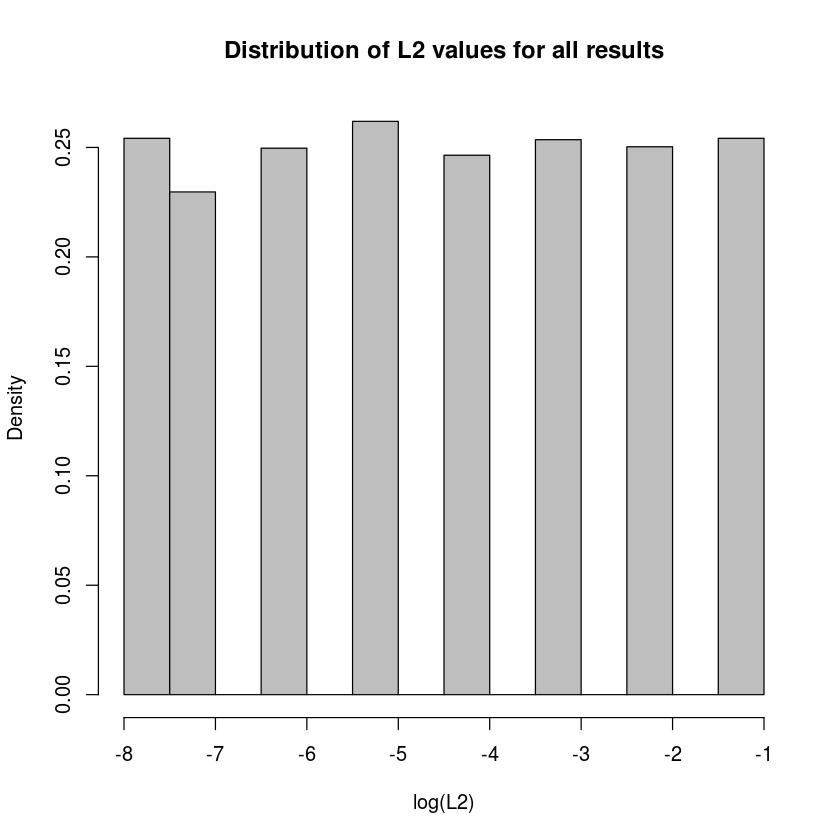

In [196]:
hist(log10(best_results$L2), freq=F, 
     xlab="log(L2)", col="grey", 
     main="Distribution of L2 values for best results (accuracy>=0.7)"
     )
hist(log10(mydata$L2), freq=F, 
     xlab="log(L2)", col="grey", 
     main="Distribution of L2 values for all results"
     )

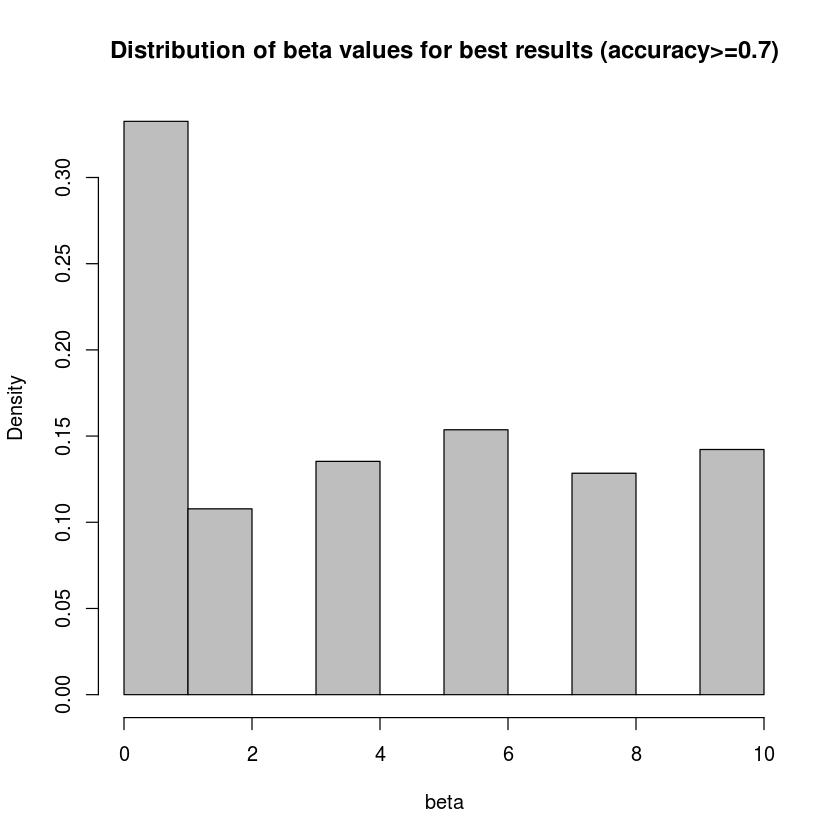

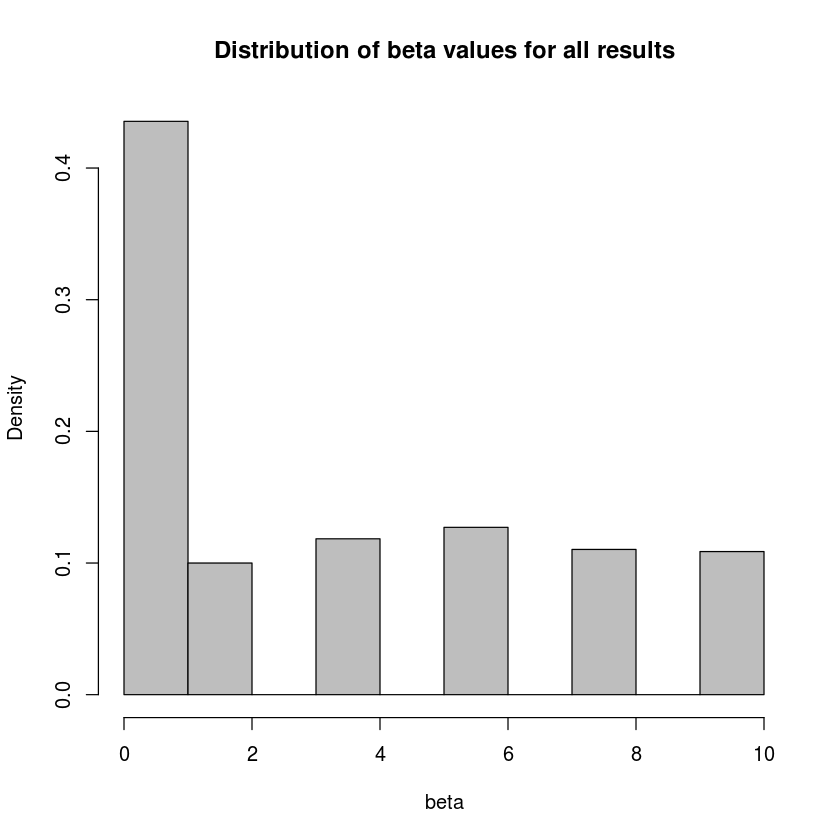

In [194]:
hist(best_results$beta, freq=F, 
     xlab="beta", col="grey", 
     main="Distribution of beta values for best results (accuracy>=0.7)"
     )
hist(mydata$beta, freq=F, 
     xlab="beta", col="grey", 
     main="Distribution of beta values for all results"
     )

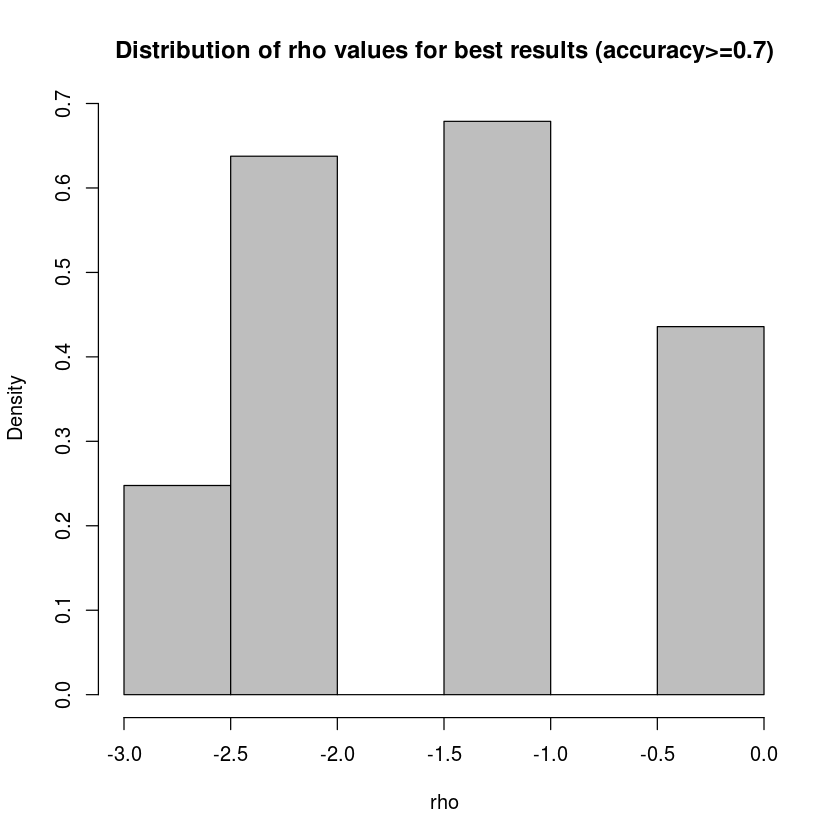

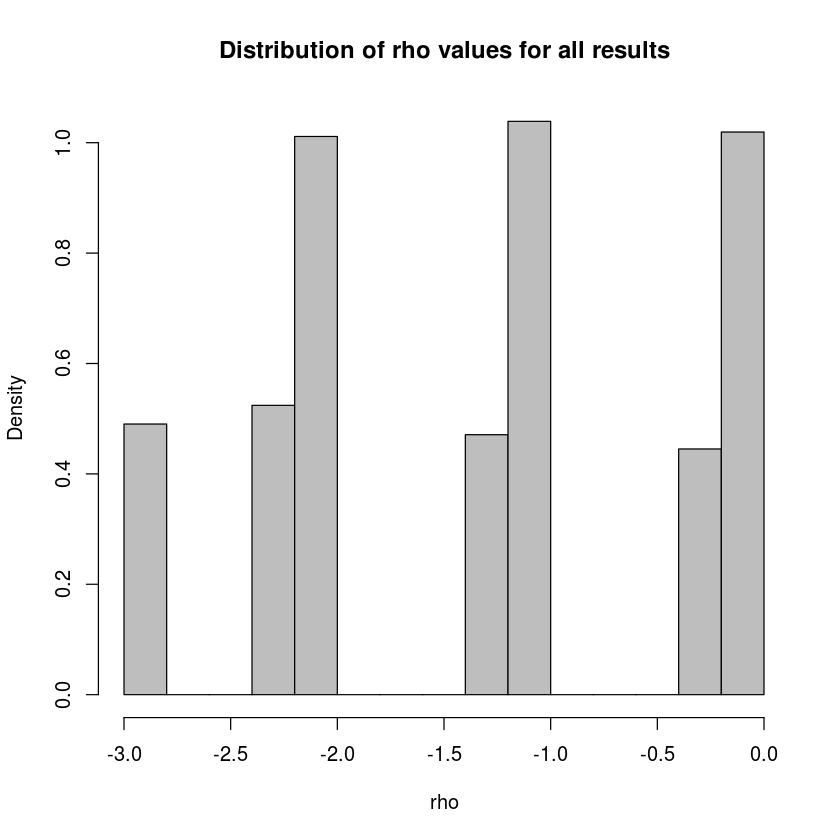

In [208]:
hist(log10(best_results$rho), freq=F, 
     xlab="rho", col="grey", 
     main="Distribution of rho values for best results (accuracy>=0.7)"
     
     )
hist(log10(mydata$rho), freq=F, 
     xlab="rho", col="grey", 
     main="Distribution of rho values for all results"
     

     )

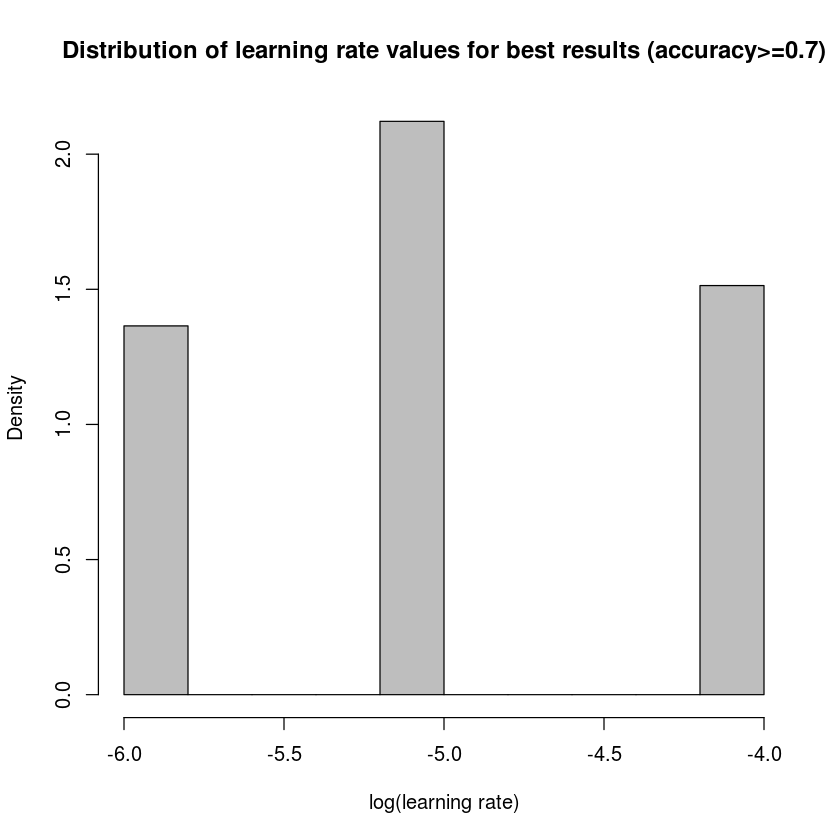

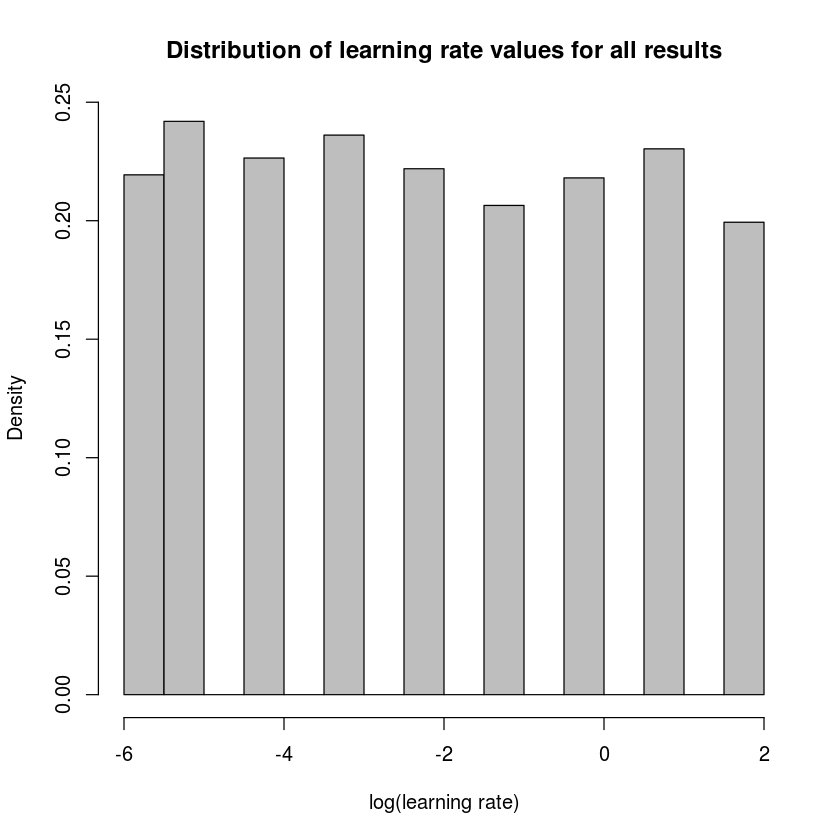

In [203]:
hist(log10(best_results$LR), freq=F, 
     xlab="log(learning rate)", col="grey", 
     main="Distribution of learning rate values for best results (accuracy>=0.7)"
     )
hist(log10(mydata$LR), freq=F, 
     xlab="log(learning rate)", col="grey", 
     main="Distribution of learning rate values for all results"
     )

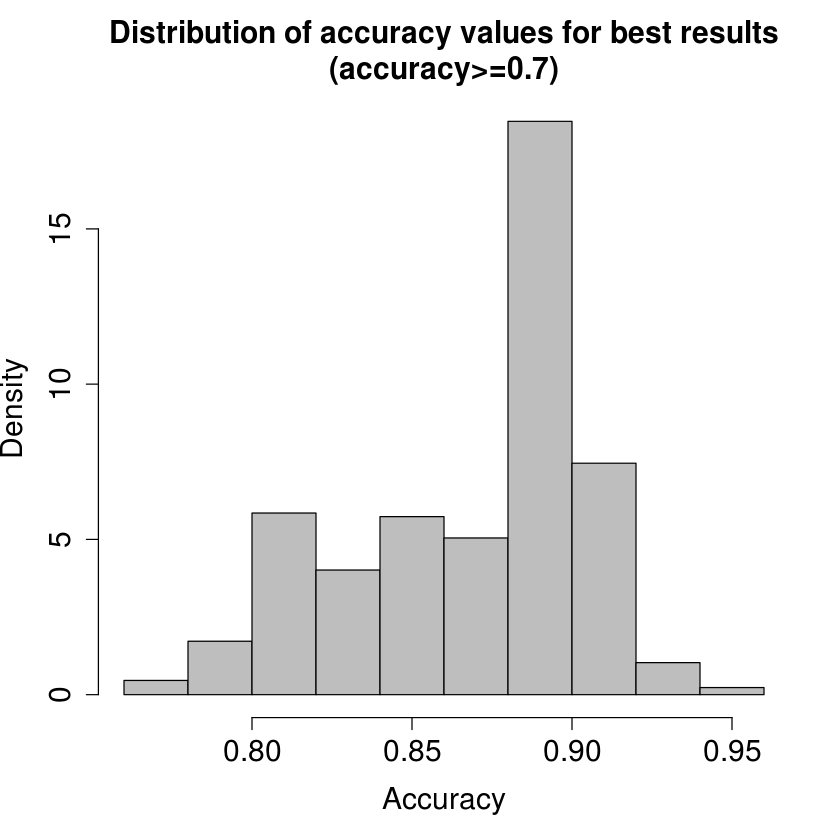

In [227]:
hist(best_results$accuracy, freq=F, 
     xlab="Accuracy", col="grey", 
     main="Distribution of accuracy values for best results\n(accuracy>=0.7)",
     cex=1.50, cex.axis=1.50, cex.lab=1.50, cex.main=1.5
     )

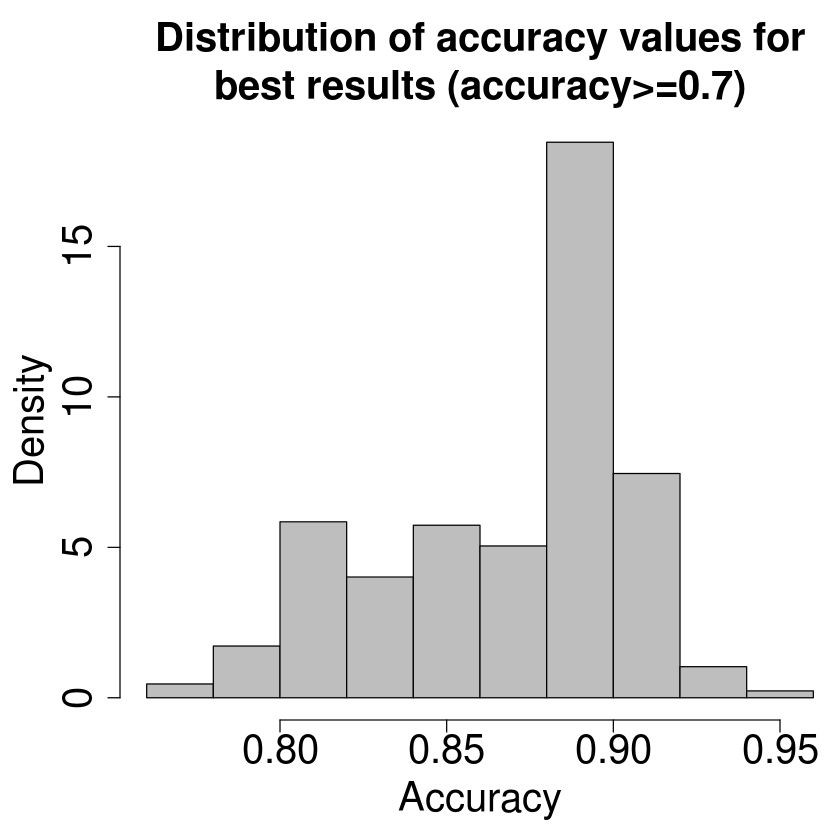

In [228]:
par(mai=c(1,1,1,0))
hist(best_results$accuracy, freq=F, 
     xlab="Accuracy", col="grey", 
     main="Distribution of accuracy values for\nbest results (accuracy>=0.7)",
     cex=2, cex.axis=2, cex.lab=2, cex.main=2
     )

In [ ]:
#All higher learning rate values were eliminated when we fitered out low accuracy results, so we can conclude that the lower learning rates performed better overall.
#However, there are no clear changes in the distribution of L1 and L2 values after we filter out low accuracy models
#Although the correlation and PCA have exhibited some associations between accuracy and beta/rho, I couldnt find major changes in beta and rho cwhen comparing the distributions of their values before versus after filtering low accuracy models.